In [1]:
import numpy as np
import pandas as pd

In [2]:
# Example from https://hvplot.holoviz.org/user_guide/Introduction.html
index = pd.date_range('1/1/2000', periods=1000)
df = pd.DataFrame(np.random.randn(1000, 4), index=index, columns=list('ABCD')).cumsum()

df.head()

,A,B,C,D
2000-01-01,-0.942159,-0.753449,1.336387,-0.842173
2000-01-02,-1.360702,1.539623,1.095339,-1.582239
2000-01-03,-3.656098,1.211106,-0.890966,-1.949255
2000-01-04,-3.856027,1.897703,-2.484013,-1.621303
2000-01-05,-3.626927,3.115511,-2.833522,-1.937753


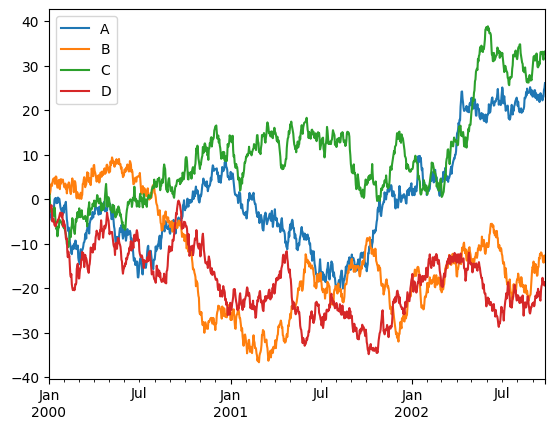

In [3]:
%matplotlib inline

df.plot();

In [4]:
import hvplot.pandas  # noqa

pd.options.plotting.backend = 'holoviews'

In [5]:
df.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [6]:
from hvplot import hvPlot
hvplot.extension('bokeh')
import colorcet as cc

In [7]:
plot = hvPlot(df)

In [8]:
plot(y=['A', 'B', 'C', 'D'])

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [9]:
# 2 plots from the same source:
plot(y=['A','B','C']) + plot(y=['C','D','A'])

:Layout
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [index]   (value)

In [10]:
# Note that A and C have different colors in the left and right figures.

In [11]:
# df is in so-called "wide" format. Each variable A, B, C, and D has its own column.
# A row in the wide format contains observations for more than one variable.
# In contrast, the "long" format contains one observation per row. To distinguish
# variables, each row has one or more columns that defines the variable.
# hvplot can also plot DataFrames in the "long" format.

# let's create a long format from df:
df2 = df.copy()
df2 = df2.reset_index()
df2 = pd.melt(df2, id_vars='index', value_vars=['A','B','C', 'D'], var_name='ABCD')
df2

,index,ABCD,value
0,2000-01-01,A,-0.942159
1,2000-01-02,A,-1.360702
2,2000-01-03,A,-3.656098
3,2000-01-04,A,-3.856027
4,2000-01-05,A,-3.626927
...,...,...,...
3995,2002-09-22,D,-18.588333
3996,2002-09-23,D,-18.540944
3997,2002-09-24,D,-18.949131
3998,2002-09-25,D,-19.410703


In [12]:
plot2 = df2.hvplot(y='value', by='ABCD')

In [13]:
# 2 plots from the same source:
# The .select() function picks the plot-variables to display.
plot2.select(ABCD=list('ABC')) + plot2.select(ABCD=list('CDA'))

:Layout
   .NdOverlay.I  :NdOverlay   [ABCD]
      :Curve   [index]   (value)
   .NdOverlay.II :NdOverlay   [ABCD]
      :Curve   [index]   (value)

In [14]:
# Note that the variable order in the legend to the right is different from the variable order in the corresponding select() call.

In [15]:
# and the C variable has different colors in the left and right figures.

In [16]:
# To force the same variable (from a specific DataFrame), you can assign 
# a specific color to the curve for each variable.
# plot2 contains the curves for all variables in df2.
# cc.b_glasbey_bw_minc_20 contains 20 distinct colors.
# the curve color can be set by the opts function: 
for p, c in zip(plot2, cc.b_glasbey_bw_minc_20):
    p.opts(color=c)

In [17]:
plot2 # this results in different colors

:NdOverlay   [ABCD]
   :Curve   [index]   (value)

In [18]:
# but always the same color for the same variable:
plot2.select(ABCD=['A','C']) + plot2.select(ABCD=list('ACB'))

:Layout
   .NdOverlay.I  :NdOverlay   [ABCD]
      :Curve   [index]   (value)
   .NdOverlay.II :NdOverlay   [ABCD]
      :Curve   [index]   (value)

In [19]:
# Let's draw 2 figures with plots from different DataFrames.
# First create a new DataFrame
df3 = df2.copy()
df3['value'] = df3['value'] * -1.50
df3

,index,ABCD,value
0,2000-01-01,A,1.413238
1,2000-01-02,A,2.041053
2,2000-01-03,A,5.484148
3,2000-01-04,A,5.784040
4,2000-01-05,A,5.440390
...,...,...,...
3995,2002-09-22,D,27.882499
3996,2002-09-23,D,27.811417
3997,2002-09-24,D,28.423696
3998,2002-09-25,D,29.116054


In [20]:
# as before, creeate a plot of the whole DataFrame
# which will contain a curve for each variable.
# and we assign the same colors to the curves as for plot2
plot3 = df3.hvplot(y='value', by='ABCD')
for p, c in zip(plot3, cc.b_glasbey_bw_minc_20):
    p.opts(color=c)

In [21]:
plot3

:NdOverlay   [ABCD]
   :Curve   [index]   (value)

In [22]:
# Draw plot2 and plot3 on top of each other
# do not show the x-axis for plot2
# hide the legend for plot3 (use plot2's legend to select/deselect curves in plot3).
p = (plot2.opts(xaxis=False) + plot3.select(variable=list('ACD')).opts(show_legend=False)).cols(1)
p

:Layout
   .NdOverlay.I  :NdOverlay   [ABCD]
      :Curve   [index]   (value)
   .NdOverlay.II :NdOverlay   [ABCD]
      :Curve   [index]   (value)

In [23]:
# now back to the wide-format dataframe
plot = df.hvplot()
for p, c in zip(plot, cc.b_glasbey_bw_minc_20):
    p.opts(color=c)

In [24]:
print(plot)

:NdOverlay   [Variable]
   :Curve   [index]   (value)


In [25]:
plot.kdims

[Dimension('Variable')]

In [26]:
plot.kdims[0].name = 'ABCD'


In [27]:
print(plot)

:NdOverlay   [ABCD]
   :Curve   [index]   (value)


In [28]:
plot.kdims[0].label = 'random ABCD'
print(plot.kdims[0].name, plot.kdims[0].label)

ABCD random ABCD


In [29]:
plot.select(ABCD=['A','B','C']) + plot.select(ABCD=['C','D','A'])

:Layout
   .NdOverlay.I  :NdOverlay   [ABCD]
      :Curve   [index]   (value)
   .NdOverlay.II :NdOverlay   [ABCD]
      :Curve   [index]   (value)